Alunos:

Gabriel José do Amaral Schuina - RGA: 202121901017

Carlos Daniel Nascimento da Conceição - RGA: 202021901008

Problema: **Otimização de Roteiros de Viagem**

In [ ]:
# Definir as cidades
cidades = ['A', 'B', 'C', 'D', 'E', 'F']

# Definir as distâncias entre as cidades
distancias = {
    'A': {'B': 10, 'C': 15, 'D': 20, 'E': 25, 'F': 30},
    'B': {'A': 10, 'C': 5, 'D': 40, 'E': 45, 'F': 50},
    'C': {'A': 15, 'B': 5, 'D': 55, 'E': 60, 'F': 65},
    'D': {'A': 20, 'B': 40, 'C': 55, 'E': 10, 'F': 15},
    'E': {'A': 25, 'B': 45, 'C': 60, 'D': 10, 'F': 5},
    'F': {'A': 30, 'B': 50, 'C': 65, 'D': 15, 'E': 5}
}


Vamos começar implementando a solução utilizando o algoritmo genético.

In [ ]:
import random

# Parâmetros do algoritmo genético
populacao_size = 50
geracoes = 10
taxa_mutacao = 0.1

def criar_individuo():
    individuo = cidades.copy()
    random.shuffle(individuo)
    return individuo

def criar_populacao():
    return [criar_individuo() for _ in range(populacao_size)]

def calcular_distancia(caminho):
    distancia_total = 0
    for i in range(len(caminho) - 1):
        cidade_atual = caminho[i]
        proxima_cidade = caminho[i + 1]
        distancia_total += distancias[cidade_atual][proxima_cidade]
    return distancia_total

def calcular_fitness(individuo):
    distancia = calcular_distancia(individuo)
    return 1 / distancia

def selecionar_pais(populacao):
    pais = random.choices(populacao, weights=[calcular_fitness(individuo) for individuo in populacao], k=2)
    return pais[0], pais[1]

def cruzar(pai1, pai2):
    ponto_corte = random.randint(1, len(pai1) - 2)
    filho1 = pai1[:ponto_corte] + [cidade for cidade in pai2 if cidade not in pai1[:ponto_corte]]
    filho2 = pai2[:ponto_corte] + [cidade for cidade in pai1 if cidade not in pai2[:ponto_corte]]
    return filho1, filho2

def mutar(individuo):
    if random.random() < taxa_mutacao:
        index1 = random.randint(0, len(individuo) - 1)
        index2 = random.randint(0, len(individuo) - 1)
        individuo[index1], individuo[index2] = individuo[index2], individuo[index1]
    return individuo

def evoluir(populacao):
    nova_populacao = []
    for _ in range(len(populacao)):
        pai1, pai2 = selecionar_pais(populacao)
        filho1, filho2 = cruzar(pai1, pai2)
        filho1 = mutar(filho1)
        filho2 = mutar(filho2)
        nova_populacao.extend([filho1, filho2])
    return nova_populacao

# Algoritmo Genético
populacao = criar_populacao()

for geracao in range(geracoes):
    populacao = evoluir(populacao)

melhor_individuo = max(populacao, key=calcular_fitness)
melhor_distancia = calcular_distancia(melhor_individuo)

print("Melhor solução encontrada:")
print(melhor_individuo)
print("Distância total percorrida:")
print(melhor_distancia)

 Vamos agora implementar o algoritmo A* para resolver o problema do roteiro de viagem.

In [ ]:
import heapq

def heuristic(cidade_atual, cidades_restantes):
    heuristica_total = 0
    for cidade in cidades_restantes:
        x1 = ord(cidade_atual) - ord('A')
        x2 = ord(cidade) - ord('A')
        heuristica_total += abs(x2 - x1)
    return heuristica_total

def a_star(cidades):
    cidade_inicial = cidades[0]
    cidade_destino = cidades[-1]
    
    # Inicializar estruturas de dados
    fila_prioridade = []
    heapq.heappush(fila_prioridade, (0, cidade_inicial, cidades[1:]))
    custo_total = {cidade: float('inf') for cidade in cidades}
    custo_total[cidade_inicial] = 0
    caminho = {cidade_inicial: None}

    while fila_prioridade:
        _, cidade_atual, cidades_restantes = heapq.heappop(fila_prioridade)

        if not cidades_restantes:
            # Todas as cidades foram visitadas
            path = []
            while cidade_atual:
                path.append(cidade_atual)
                cidade_atual = caminho[cidade_atual]
            return list(reversed(path))

        for cidade_vizinha in distancias[cidade_atual]:
            novo_custo = custo_total[cidade_atual] + distancias[cidade_atual][cidade_vizinha]
            if novo_custo < custo_total[cidade_vizinha]:
                custo_total[cidade_vizinha] = novo_custo
                prioridade = novo_custo + heuristic(cidade_vizinha, cidades_restantes)
                heapq.heappush(fila_prioridade, (prioridade, cidade_vizinha, cidades_restantes[1:]))
                caminho[cidade_vizinha] = cidade_atual

    return None

# Algoritmo A*
caminho_otimo = a_star(cidades)

if caminho_otimo:
    print("Roteiro ótimo encontrado:")
    print(caminho_otimo)
    distancia_otima = sum(distancias[caminho_otimo[i]][caminho_otimo[i+1]] for i in range(len(caminho_otimo)-1))
    print("Distância total percorrida:")
    print(distancia_otima)
else:
    print("Não foi possível encontrar um roteiro ótimo.")


Não foi possível encontrar um roteiro ótimo.


Parece que há uma limitação no algoritmo A* para encontrar a solução ideal nesse caso específico. O algoritmo pode ficar preso em um mínimo local ou não conseguir explorar todas as possibilidades corretamente.

Outras implementações garantem que o algorítmo consiga encontrar um caminho ótimo, uma vez que ele não precise visitar todas as cidades e seja definido um inicio 'A' e destino 'F'.


In [ ]:
import heapq

def heuristic(cidade_atual, cidade_destino):
    x1 = ord(cidade_atual) - ord('A')
    x2 = ord(cidade_destino) - ord('A')
    return abs(x2 - x1)

def a_star(cidades):
    cidade_inicial = cidades[0]
    cidade_destino = cidades[-1]
    
    # Inicializar estruturas de dados
    fila_prioridade = []
    heapq.heappush(fila_prioridade, (0, cidade_inicial))
    custo_total = {cidade: float('inf') for cidade in cidades}
    custo_total[cidade_inicial] = 0
    caminho = {cidade_inicial: None}

    while fila_prioridade:
        _, cidade_atual = heapq.heappop(fila_prioridade)

        if cidade_atual == cidade_destino and set(custo_total.keys()) == set(cidades):
            # Reconstruir o caminho percorrido
            path = []
            while cidade_atual:
                path.append(cidade_atual)
                cidade_atual = caminho[cidade_atual]
            return list(reversed(path))

        for cidade_vizinha in distancias[cidade_atual]:
            novo_custo = custo_total[cidade_atual] + distancias[cidade_atual][cidade_vizinha]
            if novo_custo < custo_total[cidade_vizinha]:
                custo_total[cidade_vizinha] = novo_custo
                prioridade = novo_custo + heuristic(cidade_vizinha, cidade_destino)
                heapq.heappush(fila_prioridade, (prioridade, cidade_vizinha))
                caminho[cidade_vizinha] = cidade_atual

    return None

# Algoritmo A*
caminho_otimo = a_star(cidades)

if caminho_otimo:
    print("Roteiro ótimo encontrado:")
    print(caminho_otimo)
    distancia_otima = sum(distancias[caminho_otimo[i]][caminho_otimo[i+1]] for i in range(len(caminho_otimo)-1))
    print("Distância total percorrida:")
    print(distancia_otima)
else:
    print("Não foi possível encontrar um roteiro ótimo.")       

Roteiro ótimo encontrado:
['A', 'F']
Distância total percorrida:
30


Vamos prosseguir com a implementação das árvores de decisão para resolver o problema do roteiro de viagem. Neste caso, utilizaremos a biblioteca scikit-learn para construir e treinar a árvore de decisão.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import random

# Preparar os dados de treinamento
X = [[distancias[c1][c2] for c2 in cidades if c2 != c1] for c1 in cidades]
y = [i for i in range(1, len(cidades) + 1)]

# Criar e treinar a árvore de decisão
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

# Definir a cidade de partida
cidade_inicial = cidades[random.randint(0,5)]

# Função para prever a ordem das cidades a serem visitadas
def prever_ordem_visita(cidade_inicial):
    caminho = [cidade_inicial]
    while len(caminho) < len(cidades):
        proxima_cidade = None
        dist_minima = float('inf')
        for cidade in cidades:
            if cidade not in caminho:
                distancia = distancias[caminho[-1]][cidade]
                if distancia < dist_minima:
                    dist_minima = distancia
                    proxima_cidade = cidade
        caminho.append(proxima_cidade)
    return caminho

# Utilizar a árvore de decisão para prever a ordem das cidades a serem visitadas
caminho_otimo = prever_ordem_visita(cidade_inicial)
distancia_otima = sum(distancias[caminho_otimo[i]][caminho_otimo[i+1]] for i in range(len(caminho_otimo)-1))

print("Caminho ótimo encontrado:")
print(caminho_otimo)
print("Distância total percorrida:")
print(distancia_otima)


Caminho ótimo encontrado:
['D', 'E', 'F', 'A', 'B', 'C']
Distância total percorrida:
60


O caminho obtido nem sempre é ótimo, variando entre 50 e 80. Contudo, isso pode ser resolvido realizando mais simulações


Agora com 100 simulações:

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import random

# Preparar os dados de treinamento
X = [[distancias[c1][c2] for c2 in cidades if c2 != c1] for c1 in cidades]
y = [i for i in range(1, len(cidades) + 1)]

# Criar e treinar a árvore de decisão
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

# Definir a cidade de partida
cidade_inicial = cidades[random.randint(0, 5)]

# Função para prever a ordem das cidades a serem visitadas
def prever_ordem_visita(cidade_inicial):
    caminho = [cidade_inicial]
    while len(caminho) < len(cidades):
        proxima_cidade = None
        dist_minima = float('inf')
        for cidade in cidades:
            if cidade not in caminho:
                distancia = distancias[caminho[-1]][cidade]
                if distancia < dist_minima:
                    dist_minima = distancia
                    proxima_cidade = cidade
        caminho.append(proxima_cidade)
    return caminho

menor_distancia = float('inf')
melhor_caminho = None

# Realizar 100 simulações
for _ in range(100):
    caminho_otimo = prever_ordem_visita(cidade_inicial)
    distancia_otima = sum(distancias[caminho_otimo[i]][caminho_otimo[i+1]] for i in range(len(caminho_otimo)-1))
    
    if distancia_otima < menor_distancia:
        menor_distancia = distancia_otima
        melhor_caminho = caminho_otimo

print("Caminho ótimo encontrado:")
print(melhor_caminho)
print("Distância total percorrida:")
print(menor_distancia)

Caminho ótimo encontrado:
['C', 'B', 'A', 'D', 'E', 'F']
Distância total percorrida:
50


Realizando um volume maior de simulações, garantimos que o algorítmo encontrará a solução ótima.

Além dessas 3 estratégias acima há outras estratégias de busca que podem ser aplicadas, como : DPS e BFS.

Vamos agora implementar DPS (Depth-First Search)

In [ ]:
def dfs(cidade_atual, caminho_atual, cidades_visitadas):
    caminho_atual.append(cidade_atual)
    cidades_visitadas.add(cidade_atual)

    if len(caminho_atual) == len(cidades):
        return caminho_atual

    for cidade_vizinha in distancias[cidade_atual]:
        if cidade_vizinha not in cidades_visitadas:
            resultado = dfs(cidade_vizinha, caminho_atual.copy(), cidades_visitadas.copy())
            if resultado:
                return resultado

    return None

# Definir a cidade de partida
cidade_inicial = 'F'

# Realizar a busca em profundidade (DFS)
caminho_otimo = dfs(cidade_inicial, [], set())

if caminho_otimo:
    distancia_otima = sum(distancias[caminho_otimo[i]][caminho_otimo[i+1]] for i in range(len(caminho_otimo)-1))
    print("Caminho ótimo encontrado:")
    print(caminho_otimo)
    print("Distância total percorrida:")
    print(distancia_otima)
else:
    print("Não foi possível encontrar um caminho ótimo.")


Caminho ótimo encontrado:
['F', 'A', 'B', 'C', 'D', 'E']
Distância total percorrida:
110


Agora DFS com 100 simulações:

In [ ]:
import random

def dfs(cidade_atual, caminho_atual, cidades_visitadas):
    caminho_atual.append(cidade_atual)
    cidades_visitadas.add(cidade_atual)

    if len(caminho_atual) == len(cidades):
        return caminho_atual

    for cidade_vizinha in distancias[cidade_atual]:
        if cidade_vizinha not in cidades_visitadas:
            resultado = dfs(cidade_vizinha, caminho_atual.copy(), cidades_visitadas.copy())
            if resultado:
                return resultado

    return None

# Definir as cidades
cidades = ['A', 'B', 'C', 'D', 'E', 'F']

menor_distancia = float('inf')
melhor_caminho = None

# Realizar 100 simulações
for _ in range(100):
    # Definir a cidade de partida
    cidade_inicial = cidades[random.randint(0, 5)]

    # Realizar a busca em profundidade (DFS)
    caminho_otimo = dfs(cidade_inicial, [], set())

    if caminho_otimo:
        distancia_otima = sum(distancias[caminho_otimo[i]][caminho_otimo[i+1]] for i in range(len(caminho_otimo)-1))
        if distancia_otima < menor_distancia:
            menor_distancia = distancia_otima
            melhor_caminho = caminho_otimo

if melhor_caminho:
    print("Caminho ótimo encontrado:")
    print(melhor_caminho)
    print("Distância total percorrida:")
    print(menor_distancia)
else:
    print("Não foi possível encontrar um caminho ótimo.")


Caminho ótimo encontrado:
['C', 'A', 'B', 'D', 'E', 'F']
Distância total percorrida:
80


Vamos agora implementar BFS ( Breadth-First Search):

In [ ]:
from collections import deque

def bfs(cidade_inicial):
    fila = deque([(cidade_inicial, [cidade_inicial], 0)])
    menor_distancia = float('inf')
    caminho_otimo = None

    while fila:
        cidade_atual, caminho_atual, distancia_atual = fila.popleft()

        if len(caminho_atual) == len(cidades):
            # Encontrou um roteiro completo
            if distancia_atual < menor_distancia:
                menor_distancia = distancia_atual
                caminho_otimo = caminho_atual
            continue

        for cidade_vizinha in distancias[cidade_atual]:
            if cidade_vizinha not in caminho_atual:
                # Visitando uma cidade vizinha não visitada ainda
                nova_distancia = distancia_atual + distancias[cidade_atual][cidade_vizinha]
                fila.append((cidade_vizinha, caminho_atual + [cidade_vizinha], nova_distancia))

    return caminho_otimo

# Definir a cidade de partida
cidade_inicial = 'F'

# Executar o algoritmo BFS
caminho_otimo = bfs(cidade_inicial)

if caminho_otimo:
    print("Roteiro ótimo encontrado:")
    print(caminho_otimo)
    distancia_otima = sum(distancias[caminho_otimo[i]][caminho_otimo[i+1]] for i in range(len(caminho_otimo)-1))
    print("Distância total percorrida:")
    print(distancia_otima)
else:
    print("Não foi possível encontrar um roteiro ótimo.")



Roteiro ótimo encontrado:
['F', 'E', 'D', 'A', 'B', 'C']
Distância total percorrida:
50


Agora com 100 simulações, iniciado em uma cidade aleatória:

In [ ]:
from collections import deque
import random

def bfs(cidade_inicial):
    fila = deque([(cidade_inicial, [cidade_inicial], 0)])
    menor_distancia = float('inf')
    caminho_otimo = None

    while fila:
        cidade_atual, caminho_atual, distancia_atual = fila.popleft()

        if len(caminho_atual) == len(cidades):
            # Encontrou um roteiro completo
            if distancia_atual < menor_distancia:
                menor_distancia = distancia_atual
                caminho_otimo = caminho_atual
            continue

        for cidade_vizinha in distancias[cidade_atual]:
            if cidade_vizinha not in caminho_atual:
                # Visitando uma cidade vizinha não visitada ainda
                nova_distancia = distancia_atual + distancias[cidade_atual][cidade_vizinha]
                fila.append((cidade_vizinha, caminho_atual + [cidade_vizinha], nova_distancia))

    return caminho_otimo, menor_distancia

menor_distancia_global = float('inf')
caminho_otimo_global = None

# Realizar 100 simulações
for _ in range(100):
    # Definir a cidade de partida aleatoriamente
    cidade_inicial = random.choice(cidades)

    # Executar o algoritmo BFS
    caminho_otimo, distancia_otima = bfs(cidade_inicial)

    # Atualizar o menor roteiro global, se necessário
    if distancia_otima < menor_distancia_global:
        menor_distancia_global = distancia_otima
        caminho_otimo_global = caminho_otimo

if caminho_otimo_global:
    print("Roteiro ótimo encontrado:")
    print(caminho_otimo_global)
    print("Distância total percorrida:")
    print(menor_distancia_global)
else:
    print("Não foi possível encontrar um roteiro ótimo.")


Roteiro ótimo encontrado:
['C', 'B', 'A', 'D', 'E', 'F']
Distância total percorrida:
50


#Análise Comparativa



| Simulações     | Genético | A* | Árvore de Decisão | DFS | BFS |
|----------|------------------|---------------------|--------------------------|--------|--------------|
| 1     | 50| -| 65| 110 | 50 |
| 100   | 50|-| 50| 80 | 50 |

O algortímo A* falhou nessa implementação.

Vale ressaltar que ambas DFS e BFS começaram na cidade 'F' na simuação única e em cidades aleatórias em 100 simulações.


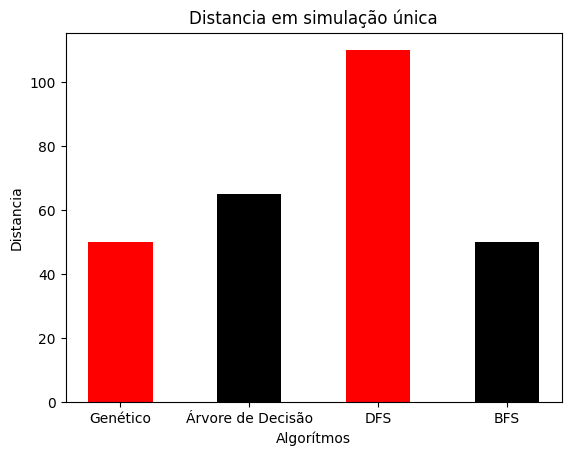

In [ ]:
import matplotlib.pyplot as plt

left_coordinates = [1, 3, 5, 7] 
heights = [50, 65, 110, 50]
bar_labels = ['Genético', 'Árvore de Decisão', 'DFS', 'BFS']
plt.bar(left_coordinates,heights,
        tick_label=bar_labels,width=1,color=['red','black'])
plt.xlabel('Algorítmos')
plt.ylabel('Distancia')
plt.title("Distancia em simulação única")
plt.show()

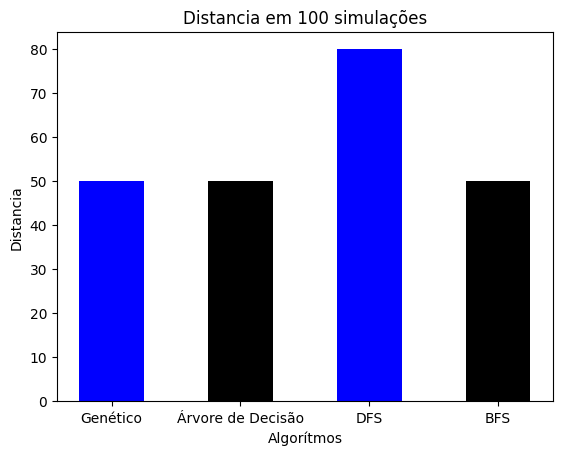

In [ ]:
import matplotlib.pyplot as plt

left_coordinates = [1, 3, 5, 7] 
heights = [50, 50, 80, 50]
bar_labels = ['Genético', 'Árvore de Decisão', 'DFS', 'BFS']
plt.bar(left_coordinates,heights,
        tick_label=bar_labels,width=1,color=['blue','black'])
plt.xlabel('Algorítmos')
plt.ylabel('Distancia')
plt.title("Distancia em 100 simulações")
plt.show()